In [1]:
import numpy as np
from effFunctions import eventEff, vertexEff,functions_event_eff,functions_vertex_eff

import itertools
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
# cm = plt.cm.get_cmap('RdYlBu')

### Get Event Efficiency

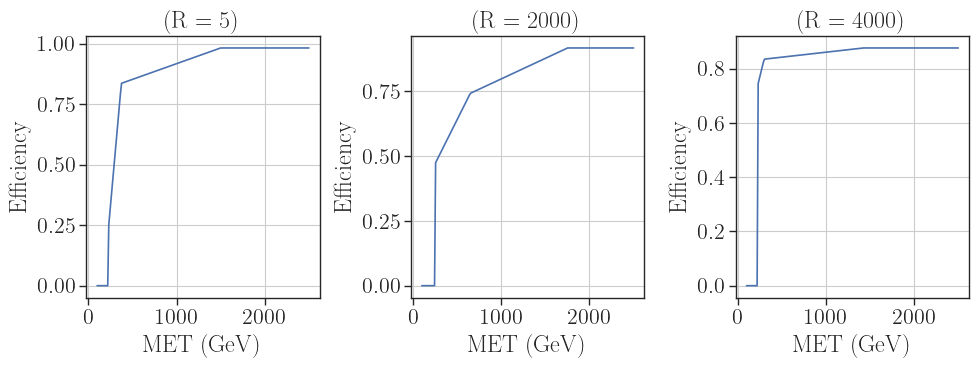

In [7]:
rVals = [5.,2000.,4000.]
pTVals = np.linspace(100.,2500.,200)
fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(10,4))
for ir,r in enumerate(rVals):
    ax = axarr[ir]
    # Select eff function
    eff_F = [f for Rint,f in functions_event_eff.items() 
                if Rint[0] < r <= Rint[1]]
    if not eff_F:
        continue
    else:
        eff_F = eff_F[0]
    y = [eff_F(x) for x in pTVals]
    ax.plot(pTVals,y)
    # ax.scatter(pTVals,y)
    ax.set_title(r'(R = %1.0f)' %(r))
    ax.set_xlabel(r'MET (GeV)')
    ax.set_ylabel('Efficiency')
    ax.grid()
plt.tight_layout()
plt.show()

### Get Vertex efficiency

In [8]:
rVals = [20.,23.,27.,35.,42.,50.,83.,110.,115.,121.,170.,200.]
mDVvals = np.logspace(0.,3.5,100)
nVals = np.logspace(0.,2.5,100)

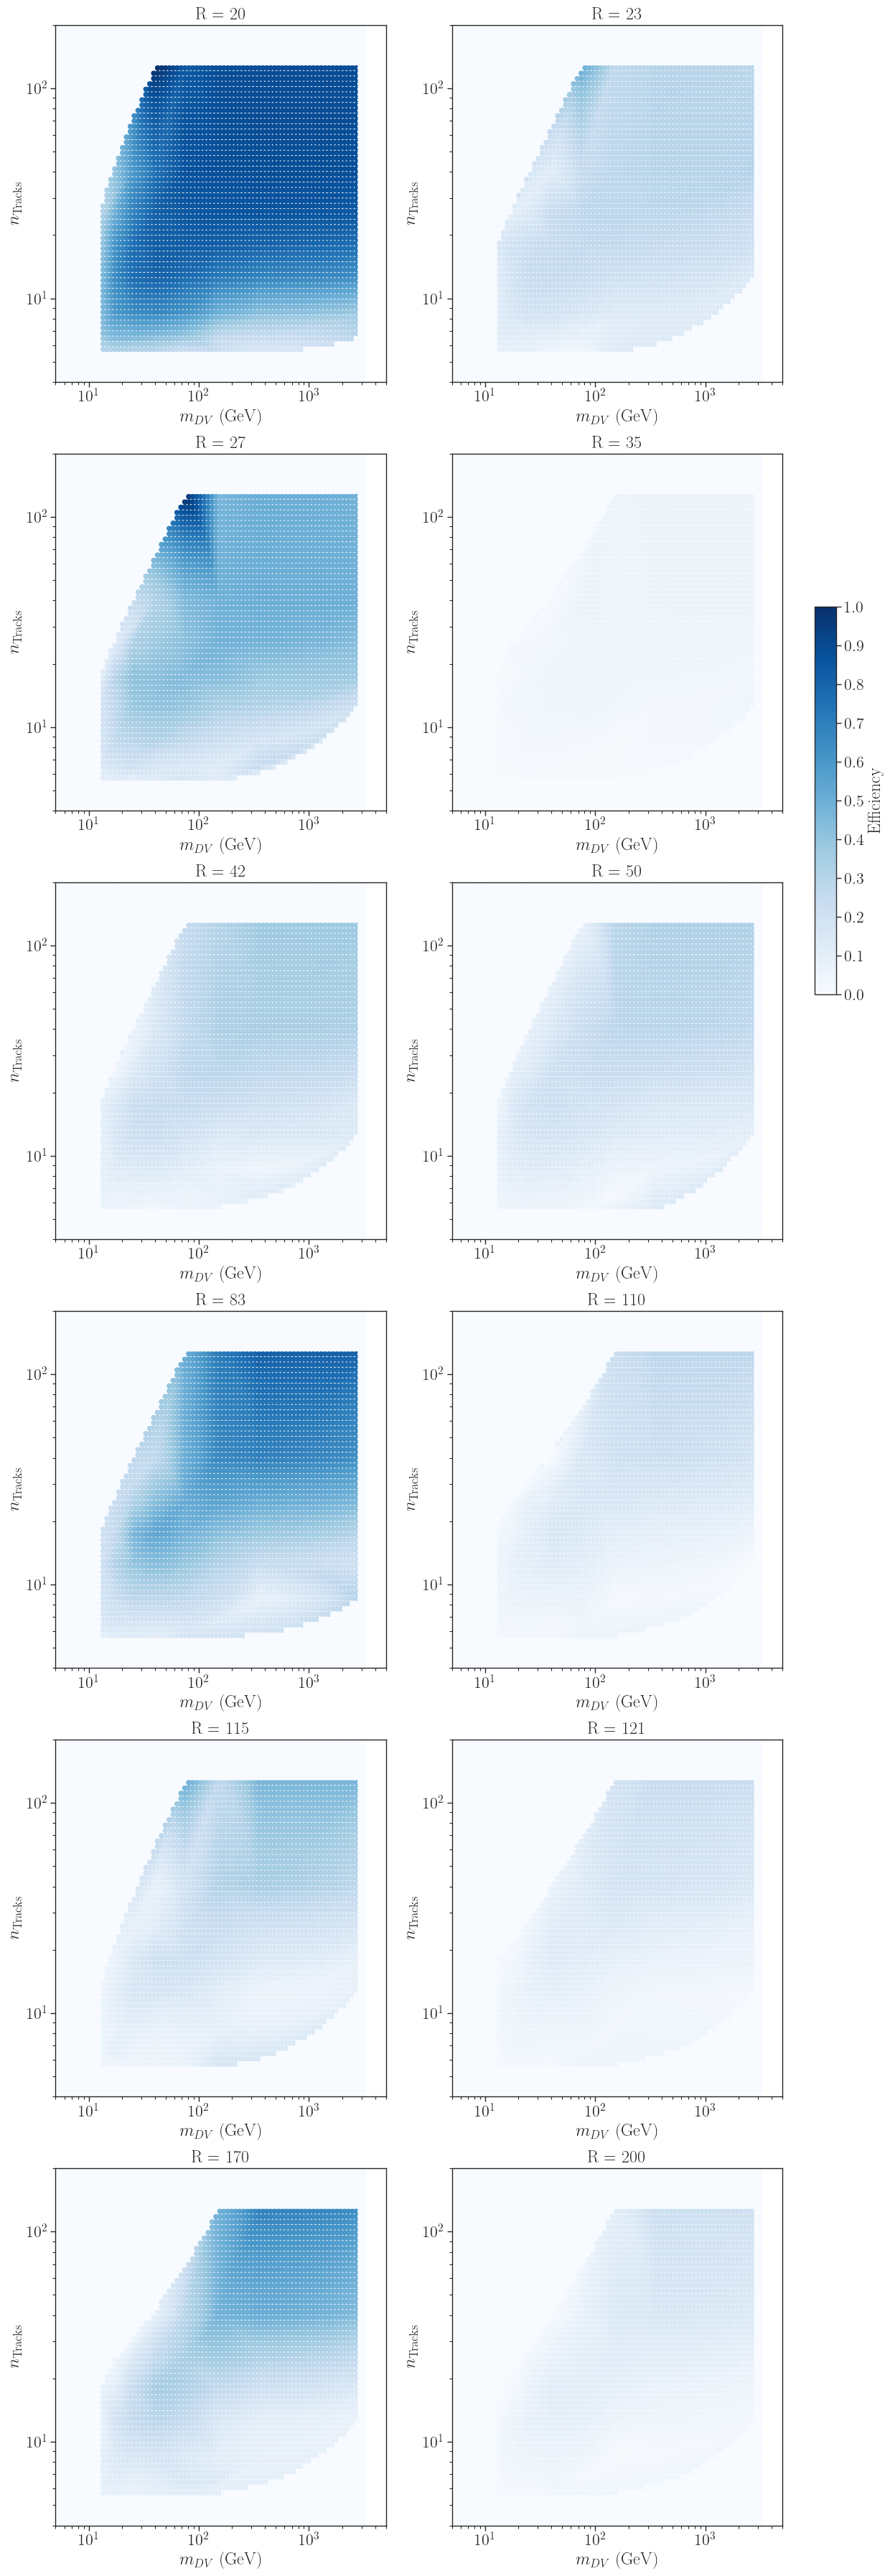

In [11]:
fig,axarr = plt.subplots(nrows=int(len(rVals)/2),ncols=2,figsize=(15,27))
# cm = sns.color_palette("viridis", as_cmap=True,N=len(np.arange(0.,1.1,0.1)))
cm = plt.colormaps["Blues"]
for ir,r in enumerate(rVals):
    ax = axarr[int(ir/2),np.mod(ir,2)]
    # Select eff function
    eff_F = [f for Rint,f in functions_vertex_eff.items() 
                if Rint[0] < r <= Rint[1]]
    if not eff_F:
        continue
    else:
        eff_F = eff_F[0]
    eff = np.array([[mDV,n,eff_F(mDV,n)] for (mDV,n) in itertools.product(mDVvals,nVals)])
    p = ax.scatter(eff[:,0],eff[:,1],c=eff[:,2],cmap=cm,vmin=0.,vmax=1.0)
    ax.set_title(r'R = %1.0f' %(r))
    ax.set_xlabel(r'$m_{DV}$ (GeV)')
    ax.set_ylabel(r'$n_{\rm Tracks}$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(5.,5000.)
    ax.set_ylim(4,200.)
    # plt.colorbar(label='Efficiency')

fig.subplots_adjust(right=0.8,top=1.4)
cbar_ax = fig.add_axes([0.83, 0.9, 0.02, 0.2])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label='Efficiency',cax=cbar_ax,ticks=np.arange(0.,1.1,0.1))
# plt.tight_layout()
plt.show()